In [1]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.cluster import AgglomerativeClustering

# 獲取當前工作目錄
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
version3_path = os.path.join(parent_dir, "Version3")

# 暫時將工作目錄切換到 Version3
os.chdir(version3_path)

from tdamapper.core_old import MapperAlgorithm
from tdamapper.cover import CubicalCover
from tdamapper.clustering import FailSafeClustering

from utils.utils_v3 import *
from utils.plots import *

try:
    myfont = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc")
    sns.set(style="whitegrid", font=myfont.get_name())
except Exception as e:
    print(e)

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

[Errno 2] No such file or directory: 'C:\\System\\Library\\Fonts\\PingFang.ttc'


In [4]:
Overlap = [5]
Interval = [2]

detailed_results = []

for d in ['Car']:

    with open(f"../ForMatrix/CalculatedData/{d}.pkl", "rb") as f:
        data = pickle.load(f)
        
    for overlap in Overlap:
        silhouette_for_intervals = []

        for interval in Interval:
            try:
                print(f'overlap: {overlap}, interval: {interval} for {d}')

                mapper_algo = MapperAlgorithm(
                    cover=CubicalCover(
                        n_intervals=interval,
                        overlap_frac=overlap / 10
                    ),
                    clustering=FailSafeClustering(
                        AgglomerativeClustering(
                            n_clusters=2,
                            linkage='ward'
                        )
                    ),
                    n_jobs=2
                )

                mapper_info = mapper_algo.fit_transform(data['mapper_numpy'], data['lens'])
                silhouette_for_intervals.append(mapper_info[1])

                result = {
                    "overlap": overlap,
                    "interval": interval,
                    "silhouette": mapper_info[1],
                    "mapper_info": mapper_info
                }

                detailed_results.append(result)

                with open(f"../ForMatrix/Output/{d}/o{overlap}i{interval}.pkl", 'wb') as file:
                    pickle.dump(result, file)

            except Exception as e:
                print(f"Error for overlap={overlap}, interval={interval}: {e}")
                continue


overlap: 5, interval: 2 for Car


overlap: 5, interval: 2 for Pass
Mapper plot created.
Data extracted.
Colors mapped using predefined mapping.
Plot saved to ../ForMatrix/Plot/Pass/o5i2.png


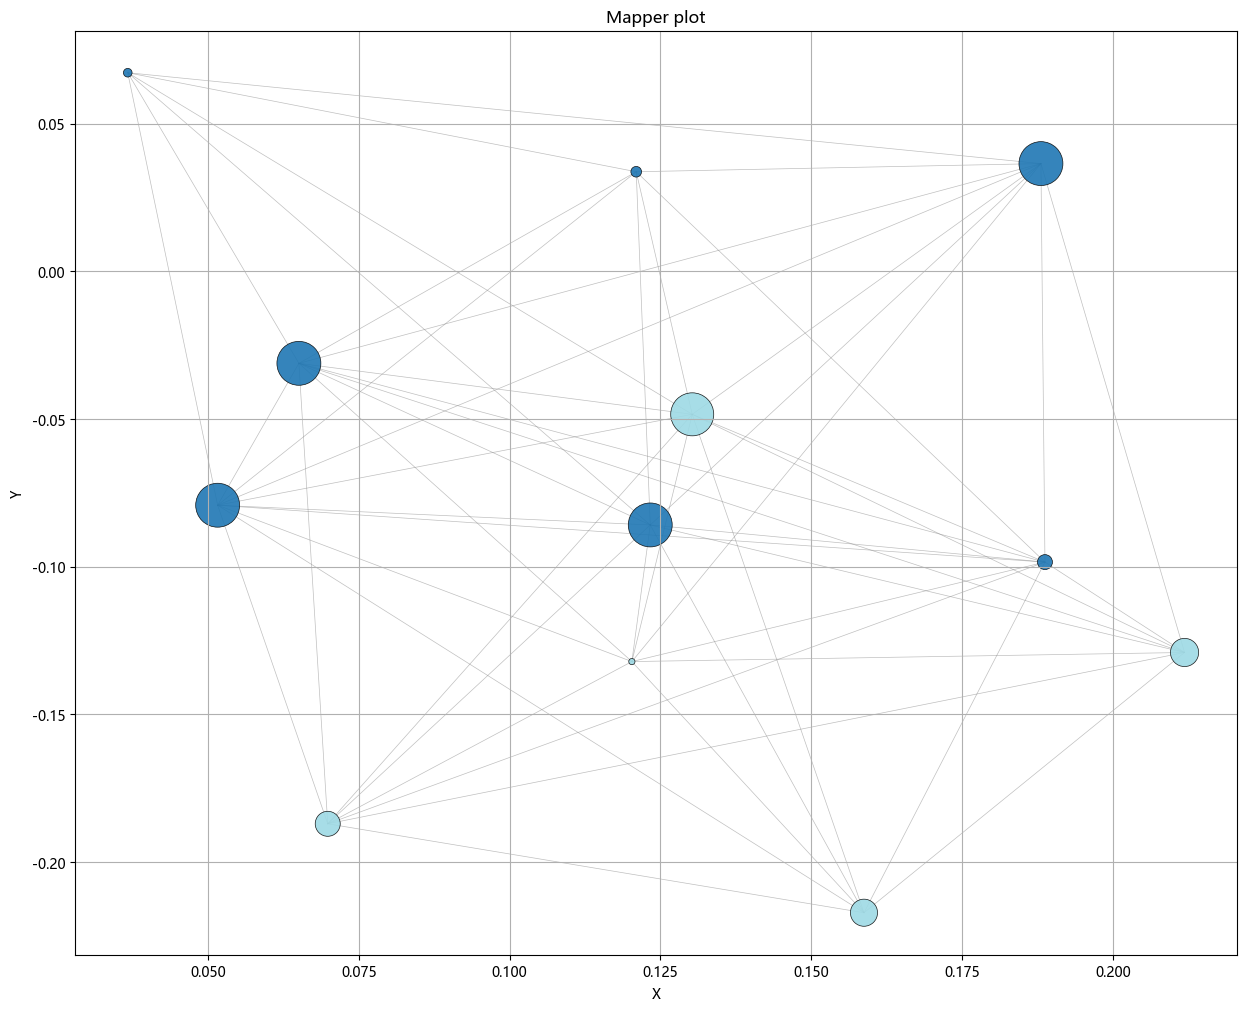

In [2]:
Overlap = [5]
Interval = [2]
choose = 'Cluster'

detailed_results = []

for d in ['Pass']:
    
    with open(f"./Data/Kmode/{d}.pkl", "rb") as f:
        kmode = pickle.load(f)
    with open(f"../ForMatrix/CalculatedData/{d}.pkl", "rb") as f:
        data = pickle.load(f)
    data['rbind_data']['Cluster'] = kmode[2]['labels']
    
    for overlap in Overlap:

        for interval in Interval:
            try:
                with open(f"../ForMatrix/Output/{d}/o{overlap}i{interval}.pkl", "rb") as f:
                    mapper_data = pickle.load(f)
        
                print(f'overlap: {overlap}, interval: {interval} for {d}')

                mapper_plotter = MapperPlotter(mapper_data['mapper_info'], data['rbind_data'], seed=35, iterations=50, dim=3,
                                range_lst=[-0.5, 0.5, 0.5, -0.5])
                mapper_plot = mapper_plotter.create_mapper_plot(choose, most_common_encoded_label, avg=False)
                full_info = mapper_plotter.extract_data()
                mapper_plotter.map_colors(choose, size=1, threshold=500)
                mapper_plotter.plot(choose, avg=False, set_label=False, size=1000,
                                    save_path=f"../ForMatrix/Plot/{d}/o{overlap}i{interval}.png")

            except Exception as e:
                print(f"Error for overlap={overlap}, interval={interval}: {e}")
                continue
